<h1>First Made modle</h1>
<p>This model aims to perdict house prices based on the size and then grow into more comlex model</p>

<h2>Importing Libraries</h2>

In [57]:
from xml.etree.ElementPath import xpath_tokenizer_re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from PIL.ImageChops import difference
from dotenv import load_dotenv
import os


<h2>Loading the dataset</h2>

In [58]:
#loads the environmental variables
load_dotenv()

#uses the environment variable dataset to load the data
csv_path=os.getenv("dataset")

#generates a pandas data frame out of the csv file
df = pd.read_csv(csv_path)

<h2>Getting the data ready fot training</h2>

In [59]:
#setting the feature and target columns
train_y = df["price"]
train_x = df["area"]

#convering the columns into numpy arrays
train_y = train_y.to_numpy()
train_x = train_x.to_numpy()

#test if it worked
print("X shape:", train_x.shape)
print("y shape:", train_y.shape)


X shape: (545,)
y shape: (545,)


<h2>Plotting the features and target on the graph for better visualization</h2>

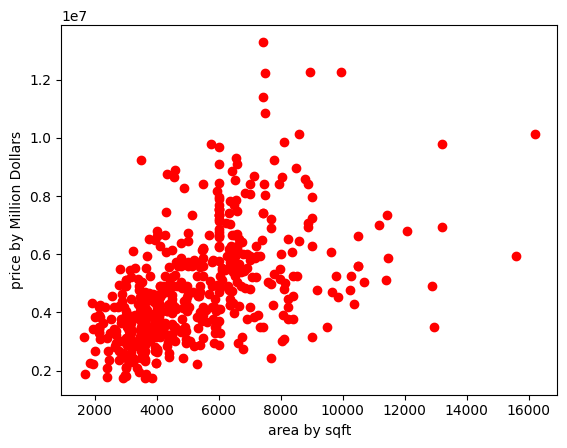

In [60]:
plt.scatter(train_x,train_y,marker='o',color='r')
plt.ylabel('price by Million Dollars')
plt.xlabel('area by sqft')
plt.show()

<h2>the linear regression model</h2>

In [66]:
def Model_1(x,w,b):

    #gets the number of rows in the training data (how many datasets we are training on)
    m = x.shape[0]

    #creats an empty array to store predictions
    f_wb = np.zeros(m)

    '''
    our model which for each entry in the training
    data it will make a perdiction using linear regression
    '''
    for i in range(m):
        f_wb[i] = ((w * x[i]) + b)

    return f_wb


<h2>Visualising the graph so we can find the line of best fit manually<br> to the best of ability</h2>

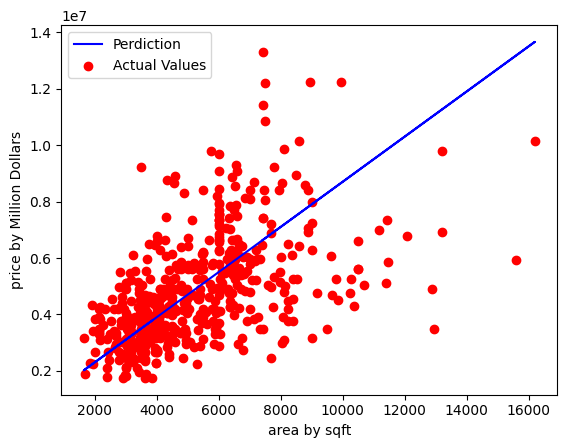

In [68]:
w =800 #Defines our weight
b = 700000 #Defines our bias

perdictions = Model_1(train_x,w,b)

plt.plot(train_x,perdictions,c='b', label='Perdiction')
plt.scatter(train_x,train_y,marker='o',color='r', label='Actual Values')
plt.ylabel('price by Million Dollars')
plt.xlabel('area by sqft')
plt.legend()
plt.show()

<h2>Making the first perdictions</h2>

In [63]:
x_i = 7420
cost_7sqft = w * x_i + b
print(f'weight = {w} and bias is {b}')
print(f'A {train_x[0]} sqft house costs ${train_y[0]}')

print(f"Model predicted a house that is {x_i} sqft costs ${cost_7sqft}")

print(f'Model is off by ${train_y[0] - cost_7sqft}')

weight = 800 and bias is 700000
A 7420 sqft house costs $13300000
Model predicted a house that is 7420 sqft costs $6636000
Model is off by $6664000


<h2>Implementing a basic cost function</h2>
<p>The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$</p>

In [69]:
def Cost(x,y,w,b):

    m = x.shape[0]

    sumCost = 0 #initialises a variable equal to zero
    for i in range(m):
        fw_i = w * x[i] + b
        '''calculates cost per perdiction by subtracting the perdiction
        from target and raising it to the power two'''
        cost = (fw_i - y[i])**2
        #calculatesa and stores the sum of all errors
        sumCost += cost
    #Divides the sum of all costs by 2m to complete the cost function
    TotalCost = sumCost/(2*m)

    return TotalCost

print(f'Current cost of Model_1 is {round(Cost(train_x,train_y,w,b)/1000000, 4)}')


Current cost of Model_1 is 1514435.7779
